<a href="https://colab.research.google.com/github/monicamayorgac/10k_challenge_water/blob/main/ds_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estructura óptima de un sistema de recolección pluvial para maximizar el volumen de agua captado en el Área Metropolitana de Monterrey
> 10k Data Science Challenge  
> Mónica Mayorga  
> Mateo Calderón  
> Rodrigo Colín  
> David Martínez



In [ ]:
!git clone https://github.com/monicamayorgac/datascience_hackaton.git

Cloning into 'datascience_hackaton'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dir_data = Path('./datascience_hackaton/data')

fname_precipitation = 'precipitation_daily_2000_2022.csv'
fname_population = 'population_census.xlsx'
fname_stations_dict = 'stations_dict.csv'

In [ ]:
precipitation = pd.read_csv(dir_data / fname_precipitation)
population = pd.read_excel(dir_data / fname_population)
stations_dict = pd.read_csv(dir_data / fname_stations_dict, encoding='latin-1')

In [ ]:
population = population.transpose()
population = population.reset_index()

header = population.iloc[0].astype("str")
population = population[1:]
population.columns = header
population = population.rename(columns={"Periodo": "Estado"})

In [ ]:
population_2020 = population[["Estado", "2020"]].sort_values(by="2020", ascending=False)
population_2020 = population_2020[population_2020['Estado'] != 'Nuevo León']
population_2020

,Estado,2020
41,Monterrey,1142994
6,Apodaca,656464
25,Guadalupe,643143
20,General Escobedo,481213
30,Juárez,471523
47,San Nicolás de los Garza,412199
18,García,397205
49,Santa Catarina,306322
43,Pesquería,147624
48,San Pedro Garza García,132169


In [ ]:
acc_precipitation_by_station = precipitation.groupby('NAME')['PRCP'].sum().sort_values(ascending=False)

In [ ]:
acc_precipitation_by_station = precipitation.groupby('NAME')['PRCP'].sum().sort_values(ascending=False)
acc_precipitation_by_station

NAME
LA BOCA, MX                   13154.5
PALMITOS GE, MX               10453.7
MONTERREY CITY, MX             9788.9
LAGUNA DE SANCHEZ, MX          9596.6
LA CIENEGA, MX                 8782.6
EL CERRITO, MX                 8751.2
LA CRUZ, MX                    7843.0
AGUA BLANCA, MX                7772.7
SAN BARTOLO, MX                7738.3
DOCTOR GONZALEZ, MX            6866.1
CIENEGA DE FLORES, MX          6382.7
GRUTAS DE GARCIA, MX           6354.5
EJIDO MARIN, MX                6291.4
APODACA, MX                    6248.7
EL PAJONAL, MX                 6175.1
MAMULIQUE, MX                  5512.7
EL HOJASE, MX                  5317.1
HIGUERAS DGE, MX               5297.5
SALINAS VICTORIA, MX           5214.7
CIENEGA DE LA PURISIMA, MX     5070.3
CADEREYTA, MX                  5053.0
LA HUASTEQUITA, MX             4766.5
MINA, MX                       3555.5
JAME, MX                       3420.6
POTRERO DE ABREGO, MX          3334.6
RINCONADA, MX                  2791.1
CHUPADE

In [ ]:
acc_precipitation_stats = precipitation.groupby('NAME')['PRCP'].describe()
acc_precipitation_stats

,count,mean,std,min,25%,50%,75%,max
NAME,,,,,,,,
"AGUA BLANCA, MX",3670.0,2.117902,11.091178,0.0,0.0,0.0,0.0,399.8
"APODACA, MX",3399.0,1.838394,9.152770,0.0,0.0,0.0,0.0,164.8
"CADEREYTA, MX",2131.0,2.371187,11.165378,0.0,0.0,0.0,0.0,192.3
"CHUPADEROS DEL INDIO, MX",3695.0,0.735507,5.295971,0.0,0.0,0.0,0.0,193.8
"CIENEGA DE FLORES, MX",3593.0,1.776426,8.193166,0.0,0.0,0.0,0.0,165.9
"CIENEGA DE LA PURISIMA, MX",2854.0,1.776559,6.489051,0.0,0.0,0.0,0.0,79.8
"DOCTOR GONZALEZ, MX",3809.0,1.802599,8.430315,0.0,0.0,0.0,0.0,170.2
"EJIDO MARIN, MX",3946.0,1.594374,7.363852,0.0,0.0,0.0,0.0,142.5
"EL CERRITO, MX",3108.0,2.815701,14.620574,0.0,0.0,0.0,0.0,329.9


In [ ]:
print('Porcentaje de registros donde no se presentó precipitación: ')
print(len(precipitation[precipitation['PRCP'] == 0]) / len(precipitation))

Porcentaje de registros donde no se presentó precipitación: 
0.81213083924447


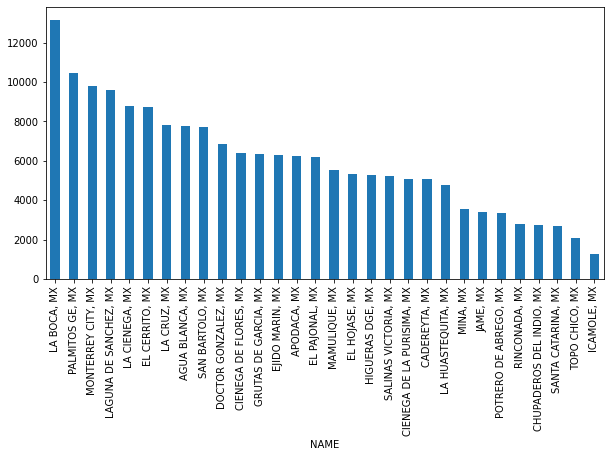

In [ ]:
plt.figure(figsize=(10, 5))
acc_precipitation_by_station.plot.bar()

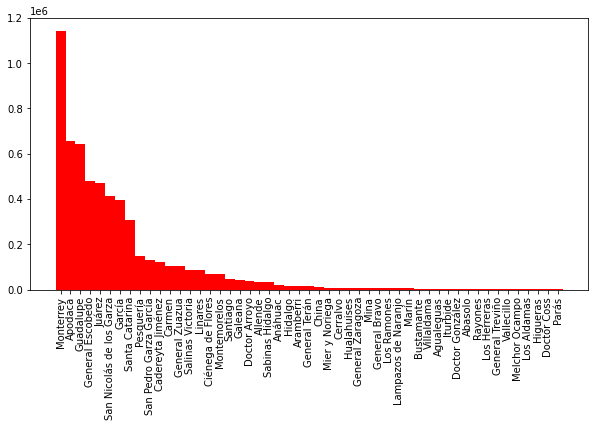

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(population_2020['Estado'], population_2020['2020'], width=1, color="red")
plt.xticks(rotation=90)
plt.show()